In [1]:
from mplsoccer.pitch import Pitch
import numpy as np
import matplotlib.pyplot as plt
from urllib.request import urlopen
from PIL import Image
import numpy as np

In [2]:
background_color = '#004D98'
line_color='#d2dde1'
marker_color = '#dcdf4c'
figsize = (16,9)
width, height = figsize
aspect = width/height

Load the crawley logo

In [3]:
IMAGE_URL = 'https://upload.wikimedia.org/wikipedia/en/8/8b/Crawley_Town_FC_logo.png'
logo = np.array(Image.open(urlopen(IMAGE_URL)))

Setup how big the axis should be

In [4]:
# note this is in reference to the figure where 1 is the whole figure (0-1)
logo_display_width = 0.08
pitch_display_width = 0.58
key_display_width = 0.2
legend_display_width = 0.05

Setup the pitch

In [5]:
pitch = Pitch(pitch_color=background_color,line_color=line_color,orientation='vertical',pitch_type='opta',
              view='half')

Calculate the length of the axis from the widths (using the aspect ratios)

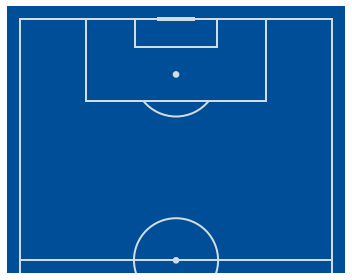

In [6]:
fig, ax = pitch.draw()
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
pitch_aspect = (abs(xmax - xmin)/abs(ymax-ymin))*pitch.aspect

In [7]:
pitch_display_height = pitch_display_width/pitch_aspect*aspect
key_display_height = key_display_width/pitch_aspect*aspect
legend_display_height = legend_display_width/pitch_aspect*aspect

In [8]:
# for this image the aspect is different so you have to calculate the logo height from its width
# so that you can get the height and width of the logo axis right
logo_height, logo_width, _ = logo.shape
logo_aspect = logo_width/logo_height
logo_display_height = logo_display_width/logo_aspect*aspect

Create a blank chart layout

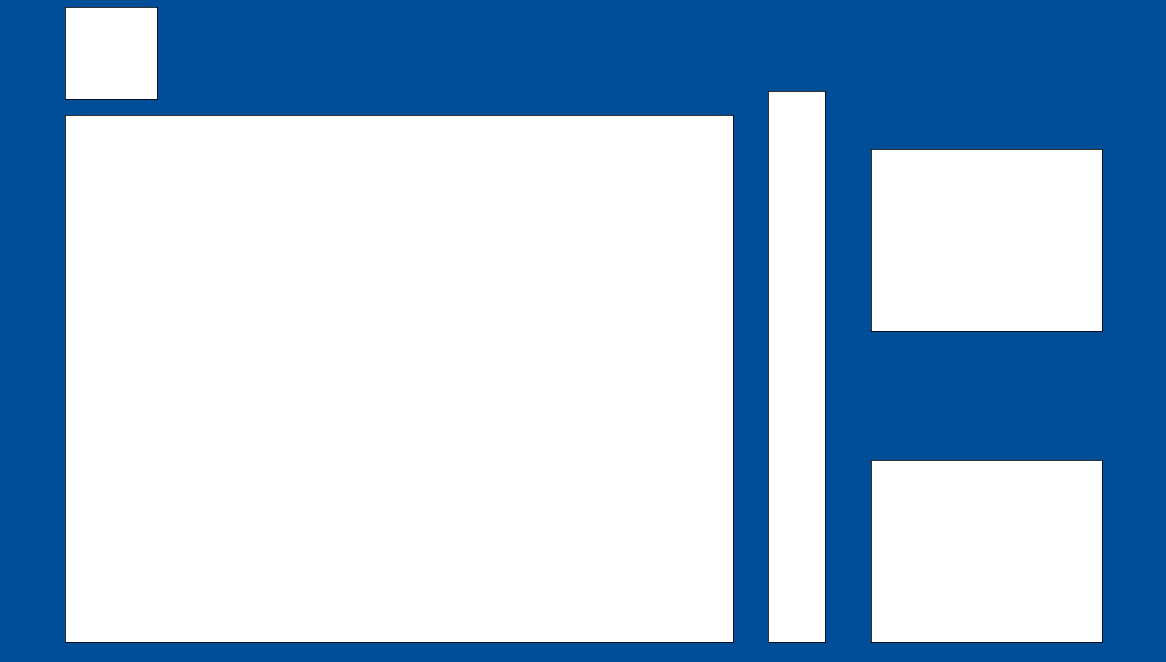

In [13]:
fig = plt.figure(figsize=figsize,facecolor=background_color);
# blank axis covering whole figure - so it all shows up
ax = fig.add_axes((0,0,1,1));
ax.axis('off');
# pitch
ax_pitch = fig.add_axes((0.05,0.02,pitch_display_width,pitch_display_height));
ax_pitch.set_yticklabels([]);
ax_pitch.set_xticklabels([]);
ax_pitch.set_xticks([], []);
ax_pitch.set_yticks([], []);
# key1
ax_key1 = fig.add_axes((0.75,0.5,key_display_width,key_display_height));
ax_key1.set_yticklabels([]);
ax_key1.set_xticklabels([]);
ax_key1.set_xticks([], []);
ax_key1.set_yticks([], []);
# key2
ax_key2 = fig.add_axes((0.75,0.02,key_display_width,key_display_height));
ax_key2.set_yticklabels([]);
ax_key2.set_xticklabels([]);
ax_key2.set_xticks([], []);
ax_key2.set_yticks([], []);
# logo
ax_logo = fig.add_axes((0.05,1-logo_display_height,logo_display_width,logo_display_height));
ax_logo.set_yticklabels([]);
ax_logo.set_xticklabels([]);
ax_logo.set_xticks([], []);
ax_logo.set_yticks([], []);
# axis for dividing line
ax_line = fig.add_axes((0.66,0.02,0.05,0.85));
ax_line.set_yticklabels([]);
ax_line.set_xticklabels([]);
ax_line.set_xticks([], []);
ax_line.set_yticks([], []);

Lets use this to plot a basic layouy

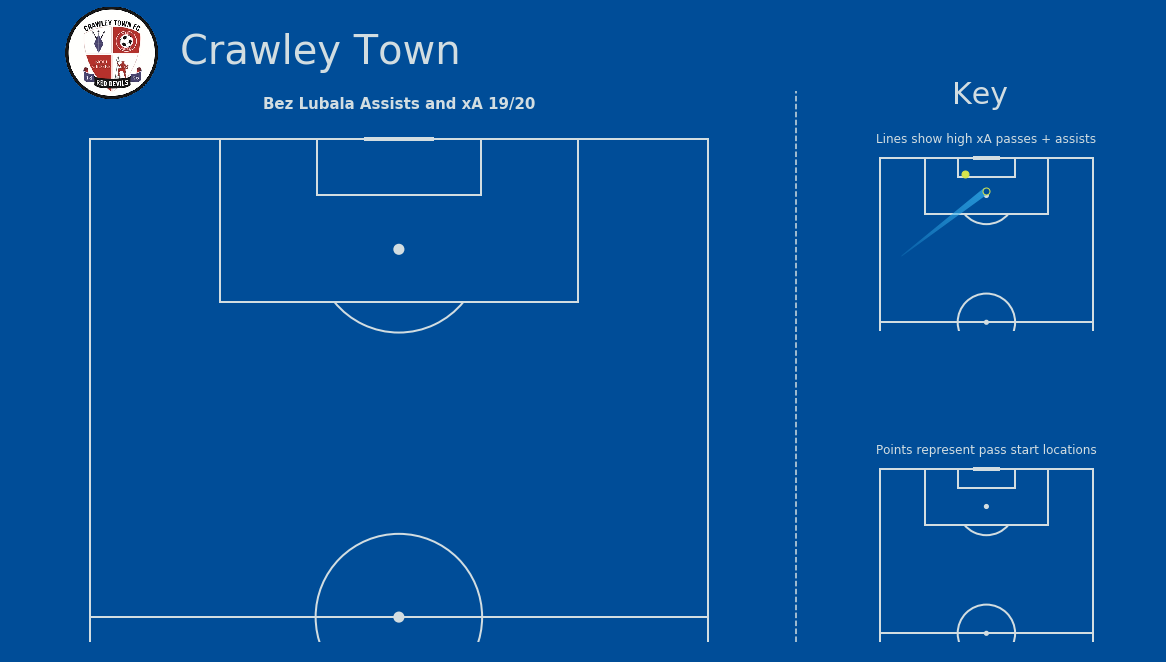

In [34]:
fig = plt.figure(figsize=figsize,facecolor=background_color);
# blank axis covering whole figure - so it all shows up
ax = fig.add_axes((0,0,1,1));
ax.axis('off');
# pitch
ax_pitch = fig.add_axes((0.05,0.02,pitch_display_width,pitch_display_height));
pitch.draw(ax=ax_pitch)
# key1
ax_key1 = fig.add_axes((0.75,0.5,key_display_width,key_display_height));
pitch.draw(ax=ax_key1)
pitch.plot(90,50,markerfacecolor=background_color,marker='o', color='None',markersize=7,zorder=3,
           linestyle='None',markeredgecolor='#d5e44c',ax=ax_key1)
pitch.plot(95,60,markerfacecolor='#d5e44c',marker='o', color='None',markersize=7,zorder=3,
           linestyle='None',markeredgecolor='#d5e44c',ax=ax_key1)
pitch.lines([70],[90],[90],[50],lw=7,transparent=True,comet=True,ax=ax_key1)
# key2
ax_key2 = fig.add_axes((0.75,0.02,key_display_width,key_display_height));
pitch.draw(ax=ax_key2)
# logo
ax_logo = fig.add_axes((0.05,1-logo_display_height,logo_display_width,logo_display_height));
ax_logo.axis('off');
ax_logo.imshow(logo);
# axis for dividing line
ax_line = fig.add_axes((0.66,0.02,0.05,0.85));
ax_line.axis('off')
ax_line.axvline(x=0.5, ymin=0, ymax=1,color=line_color,linestyle="--")
# add title
fig.suptitle("Crawley Town",x=0.15,y=0.96,verticalalignment='top',
             horizontalalignment='left',fontsize=40,color=line_color)
# add pitch title
ax_pitch.set_title("Bez Lubala Assists and xA 19/20",fontweight='bold',fontsize=15,color=line_color);
# key head title
fig.text(0.82,0.85,"Key",fontsize=30,color=line_color)
# key titles
ax_key1.set_title("Lines show high xA passes + assists",color=line_color);
ax_key2.set_title("Points represent pass start locations",color=line_color);